# Taller Raíces
Gary Defas

*Repositorio en GitHub:* https://github.com/GarySnail505/TallerRaices.git

26/10/2025


### Ejercicio 1
Para su resolución, se usó tanto los métodos de bisección como de Newton-Raphson.

Para sacar las primeras raíces se usó bisección, teniendo en cuenta que las raíces estaban en intervalos donde sus extremos tenían imágenes con diferente signo.

El que daba problemas fue la última raíz ubicada en un intervalo donde sus imágenes daban negativo, por lo que no se pudo aplicar bisección, sino Newton-Raphson

In [6]:
## CÓDIGO PARA VERIFICACIÓN DE RAÍCES
import scipy.optimize as opt

def f(x):
  return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def biseccion(a,b,n0=100000000,TOL = 10e-10):
  if f(a) * f(b) >= 0:
        print("Error: No hay cambio de signo en el intervalo [", a, ",", b, "]")
        return False

  i = 1
  FA = f(a)

  while i <= n0:
    p = a + (b-a)/2
    FP = f(p)

    if(FP == 0 or (b-a)/2 < TOL):
      print("El valor de x para que su imagen es cero es:",p)
      return True

    i = i + 1
    if FA*FP > 0:
      a = p
      FA = FP
    else:
      b = p
  return False


biseccion(-155, -140) ## Raíz 2: -152.0000000004511 = -152
biseccion(-140,-130) ## Raiz 2: -136.0000000000582 = -136

## Tercer Raíz sacada con el método Newton-Raphson
print("El valor de x para que su imagen sea cero es:",opt.newton(f,-120)) ## Raiz 3: -126


El valor de x para que su imagen es cero es: -151.99999999982538
El valor de x para que su imagen es cero es: -136.00000000034925
El valor de x para que su imagen sea cero es: -126.00000966998509


El valor de x para que su imagen es cero es: -151.9999999999891
El valor de x para que su imagen es cero es: -136.00000000013097
El valor de x para que su imagen es cero es: -126.00000966998509


<>:85: SyntaxWarning: invalid escape sequence '\ '
<>:94: SyntaxWarning: invalid escape sequence '\ '
<>:85: SyntaxWarning: invalid escape sequence '\ '
<>:94: SyntaxWarning: invalid escape sequence '\ '
C:\Users\User\AppData\Local\Temp\ipykernel_8772\3060749023.py:85: SyntaxWarning: invalid escape sequence '\ '
  print("\ Bisección: Raíz cercana a -152")
C:\Users\User\AppData\Local\Temp\ipykernel_8772\3060749023.py:94: SyntaxWarning: invalid escape sequence '\ '
  print("\ Bisección: Raíz cercana a -136")


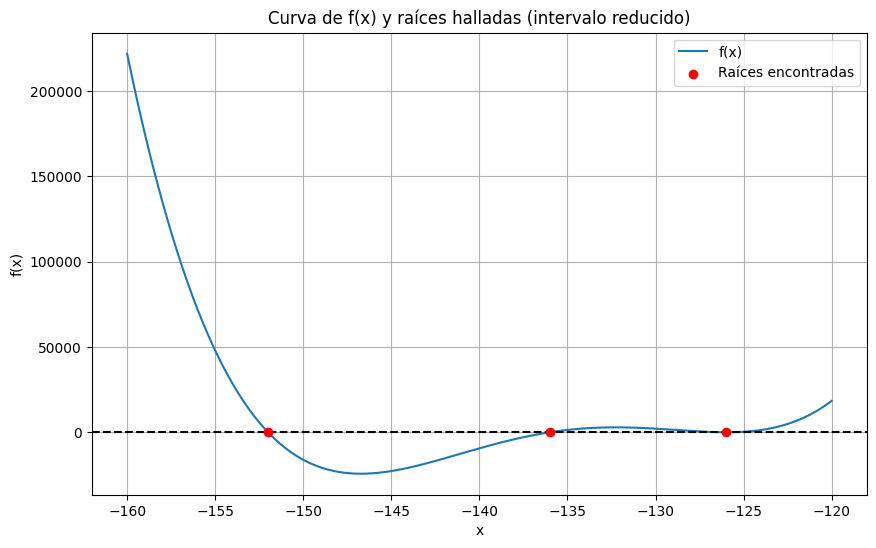

\ Bisección: Raíz cercana a -152


interactive(children=(IntSlider(value=0, description='iteracion', max=37), Output()), _dom_classes=('widget-in…

\ Bisección: Raíz cercana a -136


interactive(children=(IntSlider(value=0, description='iteracion', max=36), Output()), _dom_classes=('widget-in…

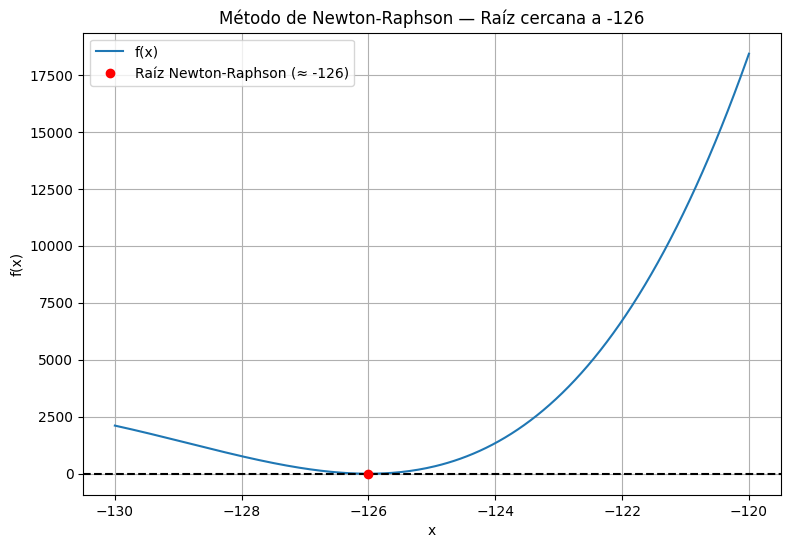

In [7]:
## CÓDIGO PARA IMPRIMIR IMÁGENES + ANIMACIÓN

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
import ipywidgets as widgets
from IPython.display import display

def f(x):
    return x**4 + 540*x**3 + 109124*x**2 + 9781632*x + 328188672

def biseccion(a,b,n0=1000,TOL=1e-10):

  pasos = []
  if f(a) * f(b) >= 0:
        print(f"Error: No hay cambio de signo en el intervalo [{a}, {b}]")
        return None, []

  i = 1
  FA = f(a)

  while i <= n0:
    p = a + (b-a)/2
    FP = f(p)
    pasos.append((a,b,p,FP))

    if(FP == 0 or (b-a)/2 < TOL):
      print("El valor de x para que su imagen es cero es:",p)
      return p, pasos

    i += 1
    if FA*FP > 0:
      a = p
      FA = FP
    else:
      b = p

  print("No se encontró raíz en el número máximo de iteraciones.")
  return None, pasos


#  Primera y segunda raices usando Método de Bisección
r1, pasos1 = biseccion(-155, -140)  # Raíz cercana a -152
r2, pasos2 = biseccion(-140,-130)   # Raíz cercana a -136

#  Tercera raíz usando Método de Newton
r3 = opt.newton(f, -120)
print(f"El valor de x para que su imagen es cero es: {r3}")

# Gráfica principal con raíces
x = np.linspace(-160, -120, 1000)
y = f(x)

plt.figure(figsize=(10,6))
plt.plot(x, y, label='f(x)')
plt.axhline(0, color='black', linestyle='--')
plt.scatter([r1, r2, r3], [0,0,0], color='red', zorder=5, label='Raíces encontradas')
plt.title('Curva de f(x) y raíces halladas (intervalo reducido)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Visualización interactiva de la Bisección
def mostrar_iteracion(iteracion, pasos, titulo):
    a, b, p, FP = pasos[iteracion]
    x = np.linspace(a-2, b+2, 200)
    y = f(x)

    plt.figure(figsize=(9,6))
    plt.plot(x, y, label='f(x)')
    plt.axhline(0, color='black', linestyle='--')
    plt.plot(p, f(p), 'ro', label='Punto medio (p)')
    plt.axvline(a, color='green', linestyle='--', label='a')
    plt.axvline(b, color='orange', linestyle='--', label='b')
    plt.title(f"{titulo}\nIteración {iteracion+1}: a={a:.4f}, b={b:.4f}, p={p:.6f}")
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Slider interactivo para Bisección (Raíz 1)
print("\ Bisección: Raíz cercana a -152")
widgets.interact(
    mostrar_iteracion,
    iteracion=widgets.IntSlider(min=0, max=len(pasos1)-1, step=1, value=0),
    pasos=widgets.fixed(pasos1),
    titulo=widgets.fixed("Método de Bisección — Raíz 1 (≈ -152)")
)

# Slider interactivo para Bisección (Raíz 2)
print("\ Bisección: Raíz cercana a -136")
widgets.interact(
    mostrar_iteracion,
    iteracion=widgets.IntSlider(min=0, max=len(pasos2)-1, step=1, value=0),
    pasos=widgets.fixed(pasos2),
    titulo=widgets.fixed("Método de Bisección — Raíz 2 (≈ -136)")
)

# Visualización del resultado de Newton-Raphson
x_zoom = np.linspace(-130, -120, 300)
y_zoom = f(x_zoom)

plt.figure(figsize=(9,6))
plt.plot(x_zoom, y_zoom, label='f(x)')
plt.axhline(0, color='black', linestyle='--')
plt.plot(r3, 0, 'ro', label='Raíz Newton-Raphson (≈ -126)')
plt.title('Método de Newton-Raphson — Raíz cercana a -126')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


### Ejercicio 2

Reemplazando el valor de y = -2, la ecuación quedaría de la siguiente manera:

$$x^{2}+6x = 0$$

Se le puede resolver de manera analítica, teniendo como resultados:

$$x_1 = 0 ; x_2=-6$$

Usando métodos numéricos, se puede usar el siguiente código:

In [8]:
import scipy.optimize as opt

def f(x):
  return x**2 + 6*x

print("El valor de x para que su imagen sea cero es:",opt.newton(f,-2)) ## x1=0
print("El valor de x para que su imagen sea cero es:",opt.newton(f,-5)) ## x2=-6

El valor de x para que su imagen sea cero es: -1.6781227193551881e-16
El valor de x para que su imagen sea cero es: -5.999999999999988


El valor de x para que su imagen sea cero es: -1.6781227193551881e-16
El valor de x para que su imagen sea cero es: -5.999999999999988


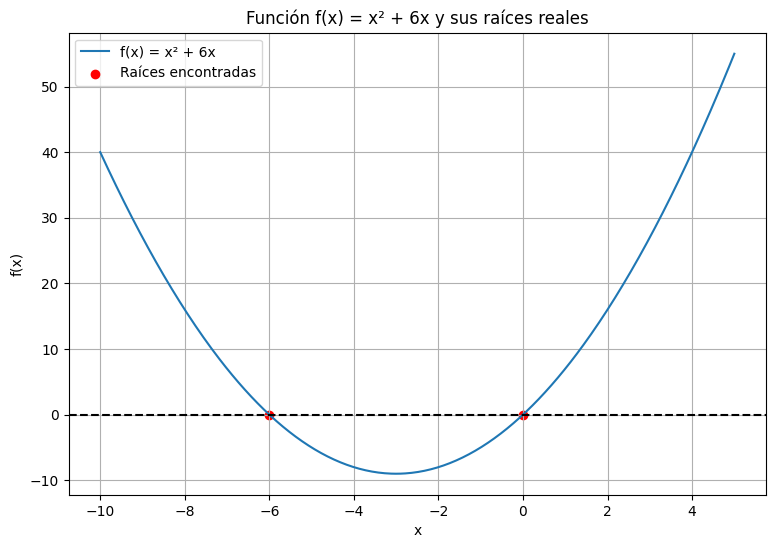


 Método de Newton-Raphson (Raíz cercana a 0)


interactive(children=(IntSlider(value=0, description='iteracion', max=7), Output()), _dom_classes=('widget-int…


 Método de Newton-Raphson (Raíz cercana a -6)


interactive(children=(IntSlider(value=0, description='iteracion', max=5), Output()), _dom_classes=('widget-int…

<function __main__.mostrar_newton(iteracion, pasos, titulo)>

In [9]:

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import scipy.optimize as opt

def f(x):
    return x**2 + 6*x

def fprime(x):
    return 2*x + 6

x1 = opt.newton(f, -2)
x2 = opt.newton(f, -5)
print("El valor de x para que su imagen sea cero es:", x1)  # raíz 0
print("El valor de x para que su imagen sea cero es:", x2)  # raíz -6

#  Gráfica general de la función 
x = np.linspace(-10, 5, 400)
y = f(x)

plt.figure(figsize=(9,6))
plt.plot(x, y, label='f(x) = x² + 6x')
plt.axhline(0, color='black', linestyle='--')
plt.scatter([x1, x2], [0,0], color='red', label='Raíces encontradas')
plt.title('Función f(x) = x² + 6x y sus raíces reales')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

#  Simulación iterativa de Newton-Raphson paso a paso 
def newton_iter(f, fprime, x0, tol=1e-10, nmax=20):
    pasos = [x0]
    for _ in range(nmax):
        x1 = x0 - f(x0)/fprime(x0)
        pasos.append(x1)
        if abs(x1 - x0) < tol:
            break
        x0 = x1
    return pasos

# Obtener pasos para cada raíz
pasos_x1 = newton_iter(f, fprime, -2)
pasos_x2 = newton_iter(f, fprime, -5)

#  Función para mostrar iteración 
def mostrar_newton(iteracion, pasos, titulo):
    x_range = np.linspace(-10, 5, 400)
    y_range = f(x_range)
    xi = pasos[iteracion]
    
    plt.figure(figsize=(9,6))
    plt.plot(x_range, y_range, label='f(x)')
    plt.axhline(0, color='black', linestyle='--')
    plt.plot(xi, f(xi), 'ro', label='Iteración actual')
    
    # Dibujar la tangente (línea de Newton)
    slope = fprime(xi)
    intercept = f(xi) - slope*xi
    x_tangent = np.linspace(xi-2, xi+2, 100)
    y_tangent = slope*x_tangent + intercept
    plt.plot(x_tangent, y_tangent, 'g--', label='Tangente en xₙ')
    
    plt.title(f"{titulo}\nIteración {iteracion+1}: xₙ = {xi:.6f}")
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

#  Interactividad con sliders 
print("\n Método de Newton-Raphson (Raíz cercana a 0)")
widgets.interact(
    mostrar_newton,
    iteracion=widgets.IntSlider(min=0, max=len(pasos_x1)-1, step=1, value=0),
    pasos=widgets.fixed(pasos_x1),
    titulo=widgets.fixed("Convergencia hacia raíz x = 0")
)

print("\n Método de Newton-Raphson (Raíz cercana a -6)")
widgets.interact(
    mostrar_newton,
    iteracion=widgets.IntSlider(min=0, max=len(pasos_x2)-1, step=1, value=0),
    pasos=widgets.fixed(pasos_x2),
    titulo=widgets.fixed("Convergencia hacia raíz x = -6")
)


### Ejercicio 3
Teniendo en cuenta el comportamiento que proporciona la función $f(x) = \frac{sin(x)}{x}$, que tenderá a cero cada vez que x tiende a infinito. Entonces debemos encontrar el valor tal que $f(x) < 0.015$, en otras palabras, debemos encontrar un x tal que $f(x) = 0.015$, puesto a que la amplitud de la función va a disminuyendo, por ende, va a haber un último valor donde ese valor sea 0.015

Resolver:
$$\frac{sin(x)}{x} - 0.015 = 0$$

El valor de x_T ≈ 3.095149 tal que f(x_T) = 0.015


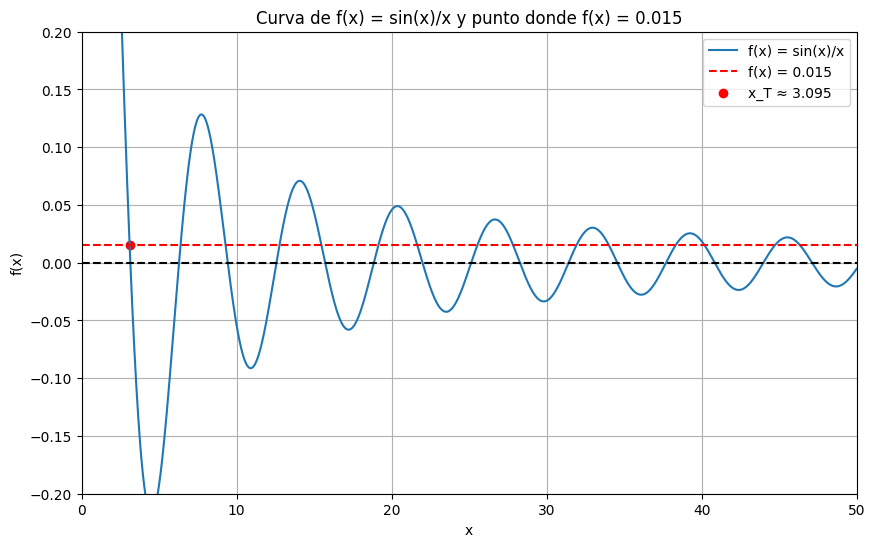

interactive(children=(IntSlider(value=0, description='iteracion', max=10), Output()), _dom_classes=('widget-in…

<function __main__.mostrar_iteracion(iteracion)>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize as opt
import ipywidgets as widgets

def f(x):
    return np.sin(x)/x

def g(x):
    return f(x) - 0.015

# Exploramos visualmente el rango
eje_x = np.linspace(1, 100, 10000)
eje_y = g(eje_x)

# Buscamos cambio de signo
cambios_signos = np.where(np.sign(eje_y[:-1]) != np.sign(eje_y[1:]))[0]
if len(cambios_signos) > 0:
    idx = cambios_signos[0]
    a, b = eje_x[idx], eje_x[idx+1]
else:
    a, b = 1, 100

# Método de Bisección
x_T = opt.bisect(g, a, b)
print(f"El valor de x_T ≈ {x_T:.6f} tal que f(x_T) = 0.015")

# Gráfica general
plt.figure(figsize=(10,6))
plt.plot(eje_x, f(eje_x), label='f(x) = sin(x)/x')
plt.axhline(0.015, color='r', linestyle='--', label='f(x) = 0.015')
plt.axhline(0, color='black', linestyle='--')
plt.scatter(x_T, f(x_T), color='red', label=f'x_T ≈ {x_T:.3f}')
plt.title('Curva de f(x) = sin(x)/x y punto donde f(x) = 0.015')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.xlim(0, 50)
plt.ylim(-0.2, 0.2)
plt.grid(True)
plt.legend()
plt.show()

# Animación paso a paso del proceso de Bisección
def biseccion_iterativa(func, a, b, tol=1e-6, max_iter=50):
    pasos = []
    for _ in range(max_iter):
        p = (a + b)/2
        pasos.append((a, b, p, func(p)))
        if abs(func(p)) < tol or (b - a)/2 < tol:
            break
        if func(a) * func(p) > 0:
            a = p
        else:
            b = p
    return pasos

pasos = biseccion_iterativa(g, a, b)

# Función para mostrar iteraciones
def mostrar_iteracion(iteracion):
    a_i, b_i, p_i, fp = pasos[iteracion]
    x = np.linspace(a_i-1, b_i+1, 400)
    y = f(x)

    plt.figure(figsize=(9,6))
    plt.plot(x, y, label='f(x)')
    plt.axhline(0.015, color='r', linestyle='--', label='f(x)=0.015')
    plt.axhline(0, color='black', linestyle='--')
    plt.axvline(a_i, color='green', linestyle='--', label='a')
    plt.axvline(b_i, color='orange', linestyle='--', label='b')
    plt.scatter(p_i, f(p_i), color='red', zorder=5, label=f'p = {p_i:.4f}')
    plt.title(f"Iteración {iteracion+1}: a={a_i:.3f}, b={b_i:.3f}, p={p_i:.6f}")
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

widgets.interact(
    mostrar_iteracion,
    iteracion=widgets.IntSlider(min=0, max=len(pasos)-1, step=1, value=0)
)
